## Final Project Submission

Please fill out:
* Student name: Flavian Miano
* Student pace: Full time
* Scheduled project review date/time: 19/11/2022
* Instructor name: Mark Tiba
* Blog post URL: 


# Author/Data Scientist: Flavian Miano

# Introduction


The movie industry is a very lucrative one. IMDB, Rotten Tommatoes, The Movie Database(TMDB) and BOM movies are some of the databases with the movies data. They contains a large number of public data on films such as the title of the film, the year of release of the film, the genre of the film, the audience, the rating of critics, the duration of the film, the summary of the film, actors, directors and much more. Faced with the large amount of data available on this sites. I will use them for this analysis.


# Project Overview

## Overview

The aim of this project is to help the new Microsoft movie department to get insights. They want to get into the movie industry as it is a very fast growing industry with other big companies having a share from it. This analysis will help them get a piece of the cake.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## Objectives

The objectives of this analysis are:
* To find useful information that can help Microsoft get into the film/movie industry
* Analyze data given and answer specific questions.
* Provide insights about the movie industry


## Questions to answer

* The studio with the most movies
* What genres are most produced
* The language of the movie that is most popular
*  How the year of production has affected it worldwide_gross

## Data Description

In this analysis i will be using the following data:
   * bom.movie_gross.csv
   * tmdb.movies.csv
   * tn.movie_budgets.csv
   * rt.movie_info.tsv
   * rt.reviews.tsv
   
The datasets are extracted from the following sites:

   * Box Office.
   * IMDB.
   * Rotten Tomatoes.
   * TheMovieDB.
   * The Numbers.





## 1. Loading the data

In [1]:
# importing the packages I will be using for this project
import zippedData
import numpy as np
import sqlite3
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter

In [2]:
#importing data
bom_movies = pd.read_csv('data/bom.movie_gross.csv')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movies = pd.read_csv('data/tn.movie_budgets.csv')
rt_movie = pd.read_table('data/rt.movie_info.tsv')
rt_reviews = pd.read_table('data/rt.reviews.tsv', encoding='windows-1254') #utf-64

## Parsing the Datasets

In [3]:
#parsing through bom.movie_gross.csv
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [5]:
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [7]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [8]:
#opening the im.db

conn = sqlite3.connect("data/im.db")
movie_basics = pd.read_sql_query("""
SELECT *
FROM movie_basics
;
""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
conn = sqlite3.connect("data/im.db")
movie_ratings = pd.read_sql_query("""
SELECT *
FROM movie_basics
;
""", conn)
movie_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


## 2. Data Cleaning

### 1. Cleaning the bom_movies table

In [10]:
#Shape of bom_movies
bom_movies.shape

(3387, 5)

In [11]:
#info on bom_movies
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
#null values
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [13]:
#analyzing the null values
'''
Studio column has 5 missing values
domestic_gross column has 28 missing values
foreign_gross column has 1350 missing values
'''
#handling the missing values
'''
From the studio column it is best to drop since we cannot assume where the movie was produced
Domestic_gross column it is best to fill with the mean/mode
Dropping the foreign_gross column due to a lot of missing values
'''

'\nFrom the studio column it is best to drop since we cannot assume where the movie was produced\nDomestic_gross column it is best to fill with the mean/mode\nDropping the foreign_gross column due to a lot of missing values\n'

In [14]:
#dropping foreign_gross
bom_movies.drop(['foreign_gross'], axis = 1, inplace = True) #Uncomment

In [15]:
#filling the domestic_gross column with mode
bom_movies['domestic_gross'].fillna(bom_movies['domestic_gross'].mode()[0], inplace = True)

In [16]:
#dropping the rows with missing values in the studio column
bom_movies.dropna(inplace = True)
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [17]:
#checking the new shape of the data
bom_movies.shape

(3382, 4)

In [18]:
#finding the number of movies per studio
num_of_movies = bom_movies['studio'].value_counts()
num_of_movies

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 257, dtype: int64

In [19]:
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


### 2. Cleaning the tmdb_movies table

In [20]:
#checking duplicates
tmdb_movies.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26512    False
26513    False
26514    False
26515    False
26516    False
Length: 26517, dtype: bool

In [21]:
#info on tmdb_movies
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [22]:
#null values
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [23]:
#Analyzing the info`
'''no missing values in the tmdb_movies.csv'''

'no missing values in the tmdb_movies.csv'

In [24]:
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### 3. Cleaning the tn_movies table

In [25]:
#info on tn_movies
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
#null values
tn_movies.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [27]:
#Analyzing the info`
'''no missing values in the tn.movie_budgets.csv'''

'no missing values in the tn.movie_budgets.csv'

In [28]:
#removing the $ and , from the columns
tn_movies['production_budget'] = tn_movies['production_budget'].str.replace('$', '')
tn_movies['production_budget'] = tn_movies['production_budget'].str.replace(',', '')
tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].str.replace('$', '')
tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].str.replace(',', '')
tn_movies['domestic_gross'] = tn_movies['domestic_gross'].str.replace('$', '')
tn_movies['domestic_gross'] = tn_movies['domestic_gross'].str.replace(',', '')


#changing them to intergers
tn_movies['production_budget'] = tn_movies['production_budget'].astype('int')

tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].astype('int64')

tn_movies['domestic_gross'] = tn_movies['domestic_gross'].astype('int')

tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int32(2), int64(2), object(2)
memory usage: 226.0+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_12548\2418052573.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies['production_budget'] = tn_movies['production_budget'].str.replace('$', '')
C:\Users\User\AppData\Local\Temp\ipykernel_12548\2418052573.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].str.replace('$', '')
C:\Users\User\AppData\Local\Temp\ipykernel_12548\2418052573.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies['domestic_gros

In [29]:
#calculating the profit
tn_movies['profit'] = tn_movies['worldwide_gross'] - tn_movies['production_budget']

In [30]:
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


## Merging tables

### 1. Setting indices

In [31]:
movie_ratings.set_index('movie_id')

,primary_title,original_title,start_year,runtime_minutes,genres
movie_id,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [32]:
movie_basics.set_index('movie_id')

,primary_title,original_title,start_year,runtime_minutes,genres
movie_id,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


### 2. Merging

In [33]:
#merging the movie_basics table and movie_ratings table
basics_ratings = pd.merge(movie_basics, movie_ratings, how='inner', sort=True)

In [34]:
#setting index
basics_ratings.set_index('movie_id')

,primary_title,original_title,start_year,runtime_minutes,genres
movie_id,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [35]:
#joining the tmdb table with the movie_basics table
genre_table = pd.merge(movie_basics, tmdb_movies, how='inner', sort=True, left_on = 'original_title', right_on = 'original_title')

In [36]:
#setting index
genre_table.set_index('movie_id')

,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
movie_id,,,,,,,,,,,,,,
tt7853996,#ALLMYMOVIES,#ALLMYMOVIES,2015,NaN,Documentary,16037,[99],368247,en,0.840,2015-11-12,#ALLMYMOVIES,9.0,4
tt6856592,#Captured,#Captured,2017,81.0,Thriller,22151,[27],476424,en,1.418,2017-10-11,#Captured,3.2,6
tt5233106,#FollowFriday,#FollowFriday,2016,90.0,Thriller,18721,[53],416304,en,1.646,2016-07-01,#FollowFriday,3.2,7
tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",14656,"[18, 9648, 27, 53]",301325,de,6.099,2015-11-20,#Horror,3.3,102
tt2538204,#Lucky Number,#Lucky Number,2015,80.0,Comedy,15941,[35],359732,en,0.919,2015-09-01,#Lucky Number,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt1545759,Point Blank,À bout portant,2010,81.0,"Action,Crime,Drama",2912,"[28, 53, 80]",61404,fr,6.021,2011-07-29,Point Blank,6.6,230
tt1660302,Our Children,À perdre la raison,2012,111.0,Drama,8947,[18],121210,fr,1.972,2013-08-02,Our Children,6.8,33
tt1391142,Among Us,Änglavakt,2010,94.0,Drama,4122,[18],42747,sv,0.840,2011-01-13,Among Us,6.2,3


## 3. Exploratory Data Analysis (EDA)

### 1. The studio with the most movies

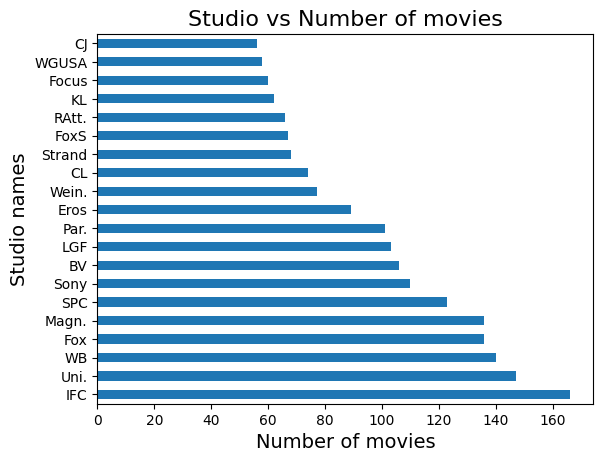

In [72]:
#Bar graph to show the studio with the most movies releases
ax = bom_movies['studio'].value_counts()[:20].plot(kind='barh')
ax.set_title('Studio vs Number of movies', fontsize=16)
ax.set_xlabel('Number of movies',fontsize=14)
ax.set_ylabel("Studio names", fontsize=14);

The bar graph above shows the studios with highest number of movies:
   * IFC productions
   * Universal studios
   * Warner Bros Studios
   * Fox Studios
   * Magn Studios
  

C:\Users\User\AppData\Local\Temp\ipykernel_12548\1518170109.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax = bom_movies['domestic_gross'][:20].plot(kind = 'barh')


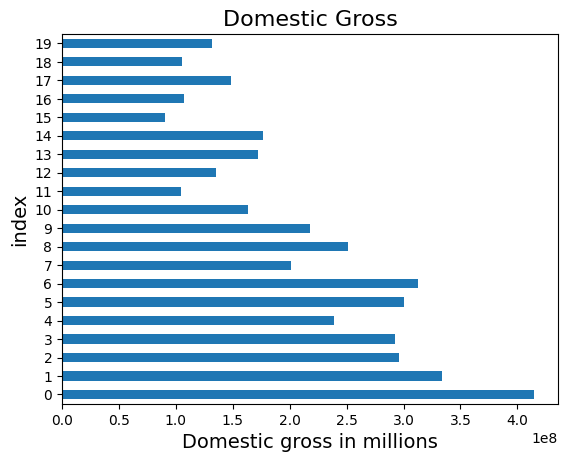

In [41]:
#graph to show the highest
ax = bom_movies['domestic_gross'][:20].plot(kind = 'barh')
ax.set_title('Domestic Gross', fontsize=16)
ax.set_xlabel("Domestic gross in millions",fontsize=14)
ax.set_ylabel("index", fontsize=14);

The domestic gross of each movie according to the bargraph shows that each gets $ 500,000 and above.

### 2. What genres are most produced.

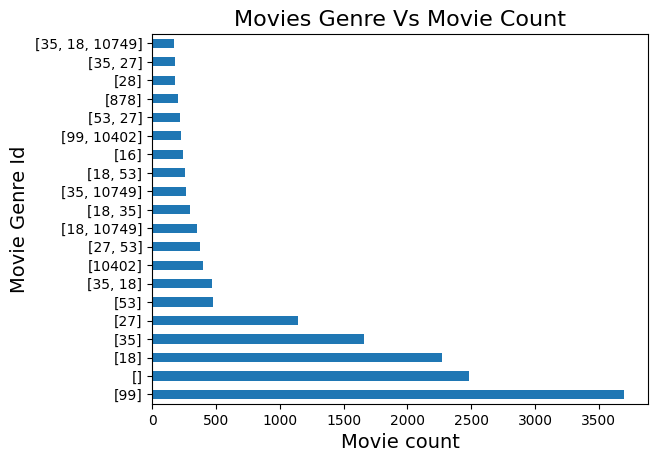

In [42]:
ax = tmdb_movies['genre_ids'].value_counts()[:20].plot(kind='barh')
ax.set_title('Movies Genre Vs Movie Count', fontsize=16)
ax.set_xlabel("Movie count",fontsize=14)
ax.set_ylabel("Movie Genre Id", fontsize=14);

From the tmdb table we can formulate the genres that are mostly in the movies.

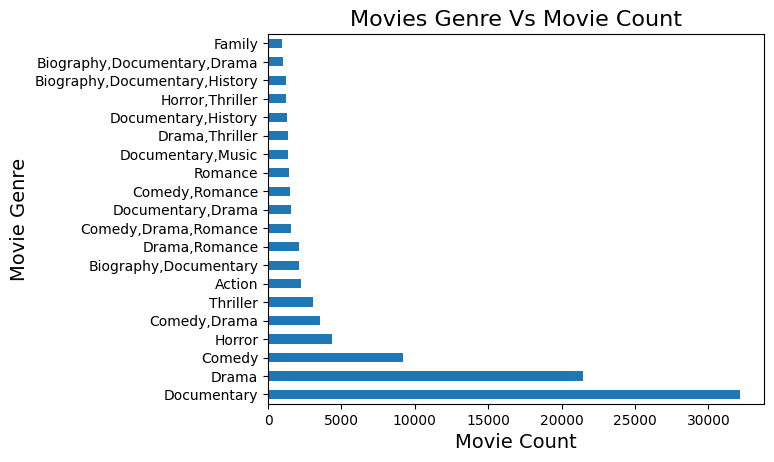

In [46]:
ax = basics_ratings['genres'].value_counts()[:20].plot(kind = 'barh')
ax.set_title('Movies Genre Vs Movie Count', fontsize=16)
ax.set_ylabel("Movie Genre",fontsize=14)
ax.set_xlabel("Movie Count", fontsize=14);

And from the basic_ratings table we can see the genres that is highly used in movies.

In [47]:
basics_ratings['genres'].fillna('Unknown', inplace = True)

In [48]:
# accessing the individual genre element per row

movie_genres = []

for genre in basics_ratings['genres']:
    movie_genres.append(genre.split(','))

In [49]:
# accessing all genre elements in the rows

genres_list = []

for data in movie_genres:
    for item in data:
        genres_list.append(item)

In [51]:
# accessing all the unique genres in the rows

unique_genres = []

for item in genres_list:
    if item not in unique_genres:
        unique_genres.append(item)

In [54]:
# finding how many films were made per genre

genre_count = Counter(genres_list)
genre_count

Counter({'Action': 10335,
         'Crime': 6753,
         'Drama': 49883,
         'Biography': 8722,
         'Comedy': 25312,
         'Fantasy': 3516,
         'Horror': 10805,
         'Thriller': 11883,
         'Adventure': 6465,
         'Animation': 2799,
         'Documentary': 51640,
         'History': 6225,
         'Unknown': 5408,
         'Mystery': 4659,
         'Sci-Fi': 3365,
         'Romance': 9372,
         'Family': 6227,
         'War': 1405,
         'Music': 4314,
         'Sport': 2234,
         'Western': 467,
         'Musical': 1430,
         'Adult': 25,
         'News': 1551,
         'Talk-Show': 50,
         'Reality-TV': 98,
         'Game-Show': 4,
         'Short': 11})

In [55]:
# separating the genres and the count

genre = []
count = []

for key, values in genre_count.items():
    genre.append(key)
    count.append(values)

[Text(0, 0, 'Action'),
 Text(1, 0, 'Crime'),
 Text(2, 0, 'Drama'),
 Text(3, 0, 'Biography'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Fantasy'),
 Text(6, 0, 'Horror'),
 Text(7, 0, 'Thriller'),
 Text(8, 0, 'Adventure'),
 Text(9, 0, 'Animation'),
 Text(10, 0, 'Documentary'),
 Text(11, 0, 'History'),
 Text(12, 0, 'Unknown'),
 Text(13, 0, 'Mystery'),
 Text(14, 0, 'Sci-Fi'),
 Text(15, 0, 'Romance'),
 Text(16, 0, 'Family'),
 Text(17, 0, 'War'),
 Text(18, 0, 'Music'),
 Text(19, 0, 'Sport'),
 Text(20, 0, 'Western'),
 Text(21, 0, 'Musical'),
 Text(22, 0, 'Adult'),
 Text(23, 0, 'News'),
 Text(24, 0, 'Talk-Show'),
 Text(25, 0, 'Reality-TV'),
 Text(26, 0, 'Game-Show'),
 Text(27, 0, 'Short')]

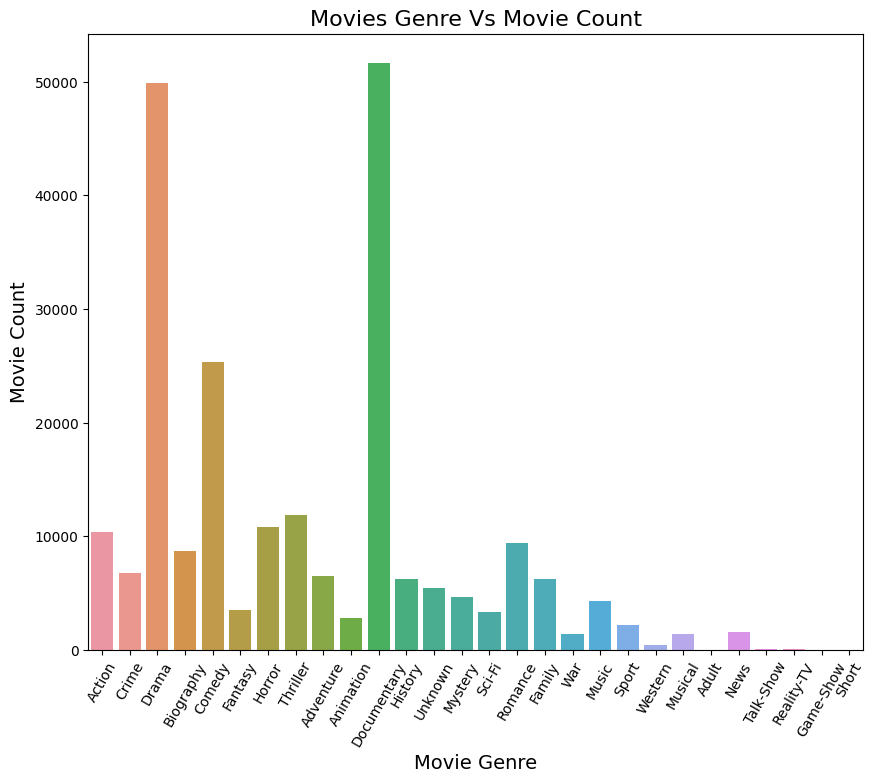

In [56]:
# plotting the data above

fig, ax = plt.subplots(figsize=(10,8))

x = genre
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Movies Genre Vs Movie Count', fontsize=16)
ax.set_xlabel("Movie Genre",fontsize=14)
ax.set_ylabel("Movie Count", fontsize=14);

ax.set_xticklabels(labels = x, rotation = 60)

From the above diagram, we can clearly interpret it as documentary having the most productions.

Most produced are:

  * Documentary
  * Drama
  * Comedy
  
Least produced are:

  * Talk shows
  * Reality Tv
  * Game Shows
  * Short films
  * Adult


### 3. The language of the movie that is most popular.

In [57]:
# accessing the individual genre element per row

lang_list = []

for lang in tmdb_movies['original_language']:
    lang_list.append(lang.split(','))

In [58]:
# accessing all genre elements in the rows

lang_list2 = []

for data in lang_list:
    for item in data:
        lang_list2.append(item)

In [59]:
# accessing all the unique genres in the rows

unique_lang = []

for item in lang_list2:
    if item not in unique_lang:
        unique_lang.append(item)

In [60]:
# finding how many films were made per genre

lang_count = Counter(lang_list2)
lang_count

Counter({'en': 23291,
         'nl': 48,
         'es': 455,
         'ja': 265,
         'sv': 68,
         'de': 237,
         'fr': 507,
         'cn': 49,
         'it': 123,
         'ru': 298,
         'zh': 177,
         'hi': 172,
         'no': 50,
         'ko': 93,
         'da': 54,
         'fi': 15,
         'pl': 52,
         'te': 30,
         'hu': 18,
         'tr': 20,
         'pt': 96,
         'he': 41,
         'fa': 29,
         'th': 41,
         'cs': 9,
         'et': 6,
         'tl': 16,
         'lt': 6,
         'xx': 24,
         'bs': 2,
         'ar': 31,
         'is': 10,
         'el': 19,
         'mr': 5,
         'hr': 3,
         'ro': 21,
         'sr': 7,
         'uk': 7,
         'nb': 1,
         'hz': 1,
         'ca': 3,
         'bg': 4,
         'sl': 1,
         'lv': 6,
         'si': 1,
         'ab': 5,
         'ta': 6,
         'bo': 1,
         'id': 13,
         'sq': 3,
         'bn': 4,
         'gu': 3,
         'lo': 4,
    

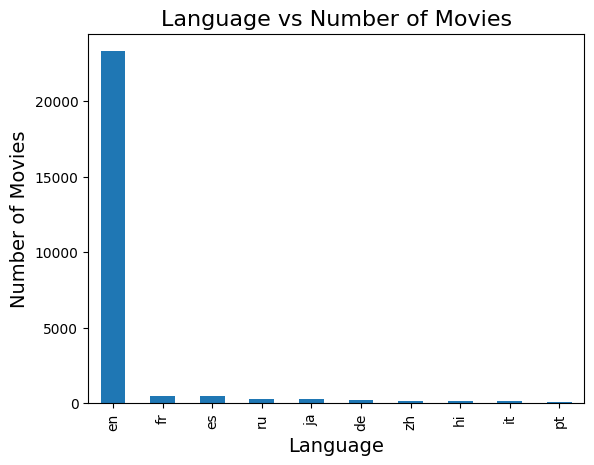

In [61]:
ax = tmdb_movies['original_language'].value_counts()[:10].plot(kind='bar')
ax.set_title('Language vs Number of Movies', fontsize=16)
ax.set_ylabel("Number of Movies",fontsize=14)
ax.set_xlabel("Language", fontsize=14);


The language used mostly to produce movies is English most probably because it is an Universal language.

Most used languages are:
   * English
   * France
   * Spanish
   * Russian
   * Japanese

### 4. How the year of production has affected it worldwide_gross

In [62]:
#changing to date/time format
tn_movies['release_date'] = pd.to_datetime(tn_movies['release_date'])
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-7000
5778,79,1999-04-02,Following,6000,48482,240495,234495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400


In [63]:
#changing it to a year
tn_movies['release_year'] = tn_movies['release_date'].dt.year

In [64]:
#grouping with the worldwide gross
gross_mean = tn_movies.groupby('release_year')['worldwide_gross'].mean()

In [65]:
#convert to a dataframe
yearly_gross_mean = pd.DataFrame(gross_mean)
yearly_gross_mean.reset_index(drop=False, inplace=True)

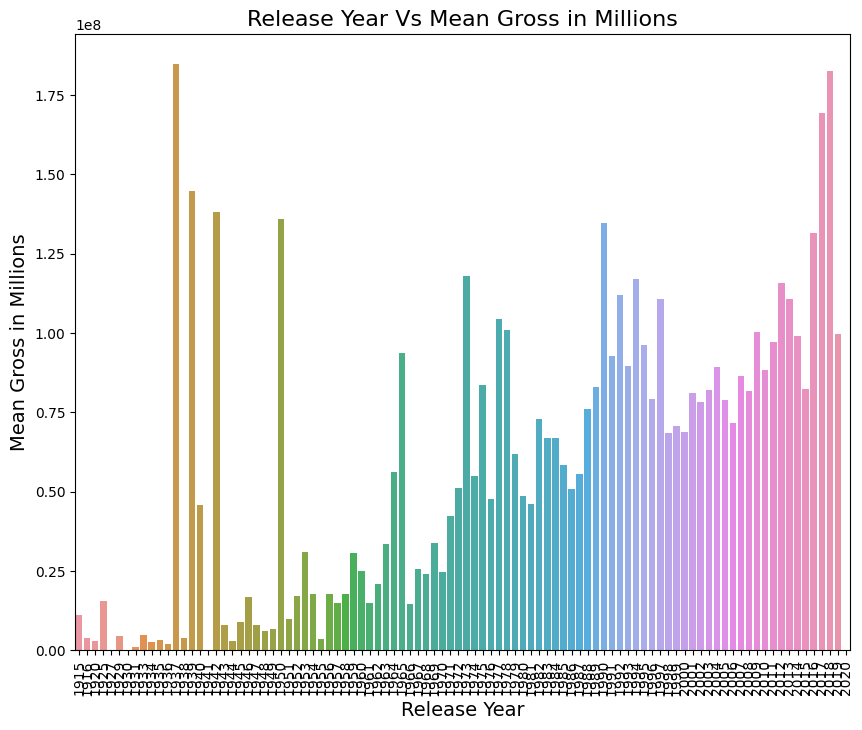

In [76]:
# plotting the data above

fig, ax = plt.subplots(figsize=(10,8))

x = yearly_gross_mean['release_year']
y = yearly_gross_mean['worldwide_gross']

ax = sns.barplot(x = x, y = y)
plt.xticks(rotation = 90)

ax.set_title('Release Year Vs Mean Gross in Millions', fontsize=16)
ax.set_xlabel("Release Year",fontsize=14)
ax.set_ylabel("Mean Gross in Millions", fontsize=14);

Through the above graph, it is very clear that the movies released in recent years have a high gross compared to years before.

# Conclusion

The preparation of the data, the modeling of these data, then the visualization of these data with a wide variety of graphs, and finally the interpretation of these graphs made it possible to conduct an analysis of the questions in hand.

**This study through a large volume of data, allowed me to determine the following points for movies:**

* The language that is most used while writing, creating and producing the movies
* The studios with the most movies out and how they would help the new movie department
* The genre with the most number of movies out
* The release year and its effect on the gross income/profit
* The average domestic gross of the movies.


# Recommendation

My recommendations are:

* Microsoft should use English for most movies while also producing movies focused on the other native languages so as toincrease their fan base. They can also include subtitles in the other native languages
* While starting out, they could collaborate with the bigger already established companies in order to get their presence known quicker.
* They should major on the production of the movie genres that have the highest number of movies out (Supply and demand).
* They should not only focus on the most common genres because there is a wide range of likes from the fan base that would like to see other types of genres.
* In this age and time of the internet they should most definitely get into the movie business.